In [1]:
# Centralized sonar defaults (inserted by sweep)
from utils.sonar_config import SONAR_VIS_DEFAULTS
sonar_config = SONAR_VIS_DEFAULTS.copy()
# Backwards-compatible variable names used in older notebooks
RANGE_MIN_M = sonar_config['range_min_m']
RANGE_MAX_M = sonar_config['range_max_m']
DISPLAY_RANGE_MAX_M = sonar_config['display_range_max_m']

# If an exported NPZ/MP4 sidecar exists, later cells will prefer that metadata.
# Optional per-notebook override (uncomment):
# RANGE_MAX_M = 20.0


In [2]:
# Centralized sonar defaults (inserted by sweep)
from utils.sonar_config import SONAR_VIS_DEFAULTS
sonar_config = SONAR_VIS_DEFAULTS.copy()
# Backwards-compatible variable names used in older notebooks
RANGE_MIN_M = sonar_config['range_min_m']
RANGE_MAX_M = sonar_config['range_max_m']
DISPLAY_RANGE_MAX_M = sonar_config['display_range_max_m']

# If an exported NPZ/MP4 sidecar is present, later cells prefer that metadata.
# Optional override example:
# RANGE_MAX_M = 20.0



# 📊 SOLAQUA - Enhanced Synchronized Sonar & Net Distance Analysis
---

In [3]:
# 🔧 SETUP AND IMPORTS
# ===================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import importlib
import warnings

# Import SOLAQUA utilities
import utils.net_distance_analysis as sda
import utils.sonar_utils as sonar_utils

# Force reload utilities to get latest changes
importlib.reload(sda)
importlib.reload(sonar_utils)

# Configuration
warnings.filterwarnings('ignore', category=FutureWarning)
plt.rcParams['figure.figsize'] = (16, 12)

print("✅ All libraries imported and utilities loaded!")
print("🚀 Ready for streamlined sonar distance analysis!")

✅ All libraries imported and utilities loaded!
🚀 Ready for streamlined sonar distance analysis!


## 🎛️ Configuration

**Change these parameters to switch bags and frames:**

In [4]:
# ANALYSIS CONFIGURATION
# =========================
# **CHANGE THESE PARAMETERS TO SWITCH ANALYSIS TARGET**

TARGET_BAG = "2024-08-22_14-06-43"  
FRAME_INDEX = 420                     
# Use configured exports folder (set in utils/sonar_config.py)
from pathlib import Path
from utils.sonar_config import EXPORTS_DIR_DEFAULT, EXPORTS_SUBDIRS
EXPORTS_FOLDER = Path(EXPORTS_DIR_DEFAULT)

print(f"Analysis Configuration:")
print(f"Target Bag: {TARGET_BAG}")
print(f"Frame Index: {FRAME_INDEX}")
print(f"Exports Folder: {EXPORTS_FOLDER}")

Analysis Configuration:
Target Bag: 2024-08-22_14-06-43
Frame Index: 420
Exports Folder: /Volumes/LaCie/SOLAQUA/exports


## 📡 Data Loading

Load all distance measurement data for the configured bag:

In [5]:
# 📡 LOAD ALL DISTANCE DATA FOR TARGET BAG
# ========================================

print(f"📡 Loading all distance data for bag: {TARGET_BAG}")
print("=" * 60)

# Load all data using utility function
raw_data, distance_measurements = sda.load_all_distance_data_for_bag(TARGET_BAG, EXPORTS_FOLDER)

# Extract individual datasets for easy access
nav_data = raw_data['navigation']
guidance_data = raw_data['guidance']

print(f"\nData loading complete!")
print(f"Navigation records: {len(nav_data) if nav_data is not None else 0}")
print(f"Guidance records: {len(guidance_data) if guidance_data is not None else 0}")
print(f"Distance sensors: {len(distance_measurements)}")

if distance_measurements:
    print(f"\nAvailable distance measurements:")
    for name, info in distance_measurements.items():
        print(f"   • {name}: {info['description']}")

📡 Loading all distance data for bag: 2024-08-22_14-06-43
 LOADING ALL DISTANCE DATA FOR BAG: 2024-08-22_14-06-43
📡 1. Loading Navigation Data...
    Loaded 322 navigation records
    NetPitch data available: 322 valid records
📡 2. Loading Guidance Data...
    Loaded 317 guidance records with ['error_net_distance', 'desired_net_distance', 'r_net_distance_d']
📡 3. Loading DVL Altimeter...
    Loaded 17 DVL altimeter records
 4. Loading USBL...
    Loaded 17 USBL records
📡 5. Loading DVL Position...
    Loaded 154 DVL position records
 6. Loading Navigation Position...
    Loaded 156 navigation position records
📡 7. Loading INS Z Position...
    Loaded 366 INS records with positionFrame.z

 LOADING SUMMARY:
    Target bag: 2024-08-22_14-06-43
    Raw data loaded: 2/2
    Distance measurements: 6

Data loading complete!
Navigation records: 322
Guidance records: 317
Distance sensors: 6

Available distance measurements:
   • DVL_Altimeter: Distance to seafloor
   • USBL_3D: 3D acoustic posit

## 🔬 Raw Data Extraction

Extract raw sonar data with run-specific parameters:

In [6]:
# INTERACTIVE SONAR WITH ROTATED NET LINE 

# Extract raw sonar data with configurable rmax
raw_matrix, processed_cone, extent, sonar_params = sda.extract_raw_sonar_data_with_configurable_rmax(
    TARGET_BAG, 
    FRAME_INDEX,
    exports_folder=EXPORTS_FOLDER
)


 EXTRACTING RAW SONAR DATA WITH CONFIGURABLE RMAX
    Bag: 2024-08-22_14-06-43
    Frame: 420
    rmax: default (20.0m)
 SONAR PARAMETERS:
    Run Type: multi_dvl_early
    Range Max: 20.0m (default)
    Description: NFH, 2m depth, 0.5-1.0m distance, 0.2 m/s speed
📡 Loading sonar data from: sensor_sonoptix_echo_image__2024-08-22_14-06-43_video.csv
    Loaded 592 sonar frames
🔍 Extracting raw sonar frame 420...
    Raw matrix shape: (1024, 256)
    Value range: 0.000 to 66.000
⚙️  Processing with rmax=20.0m...
    Processed cone shape: (700, 900)
    Extent: (np.float64(-4.330127018922193), np.float64(4.330127018922193), 0.0, 5.0)
    Timestamp: 12:07:12


/Users/eirikvarnes/code/SOLAQUA/utils/net_distance_analysis.py:669: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


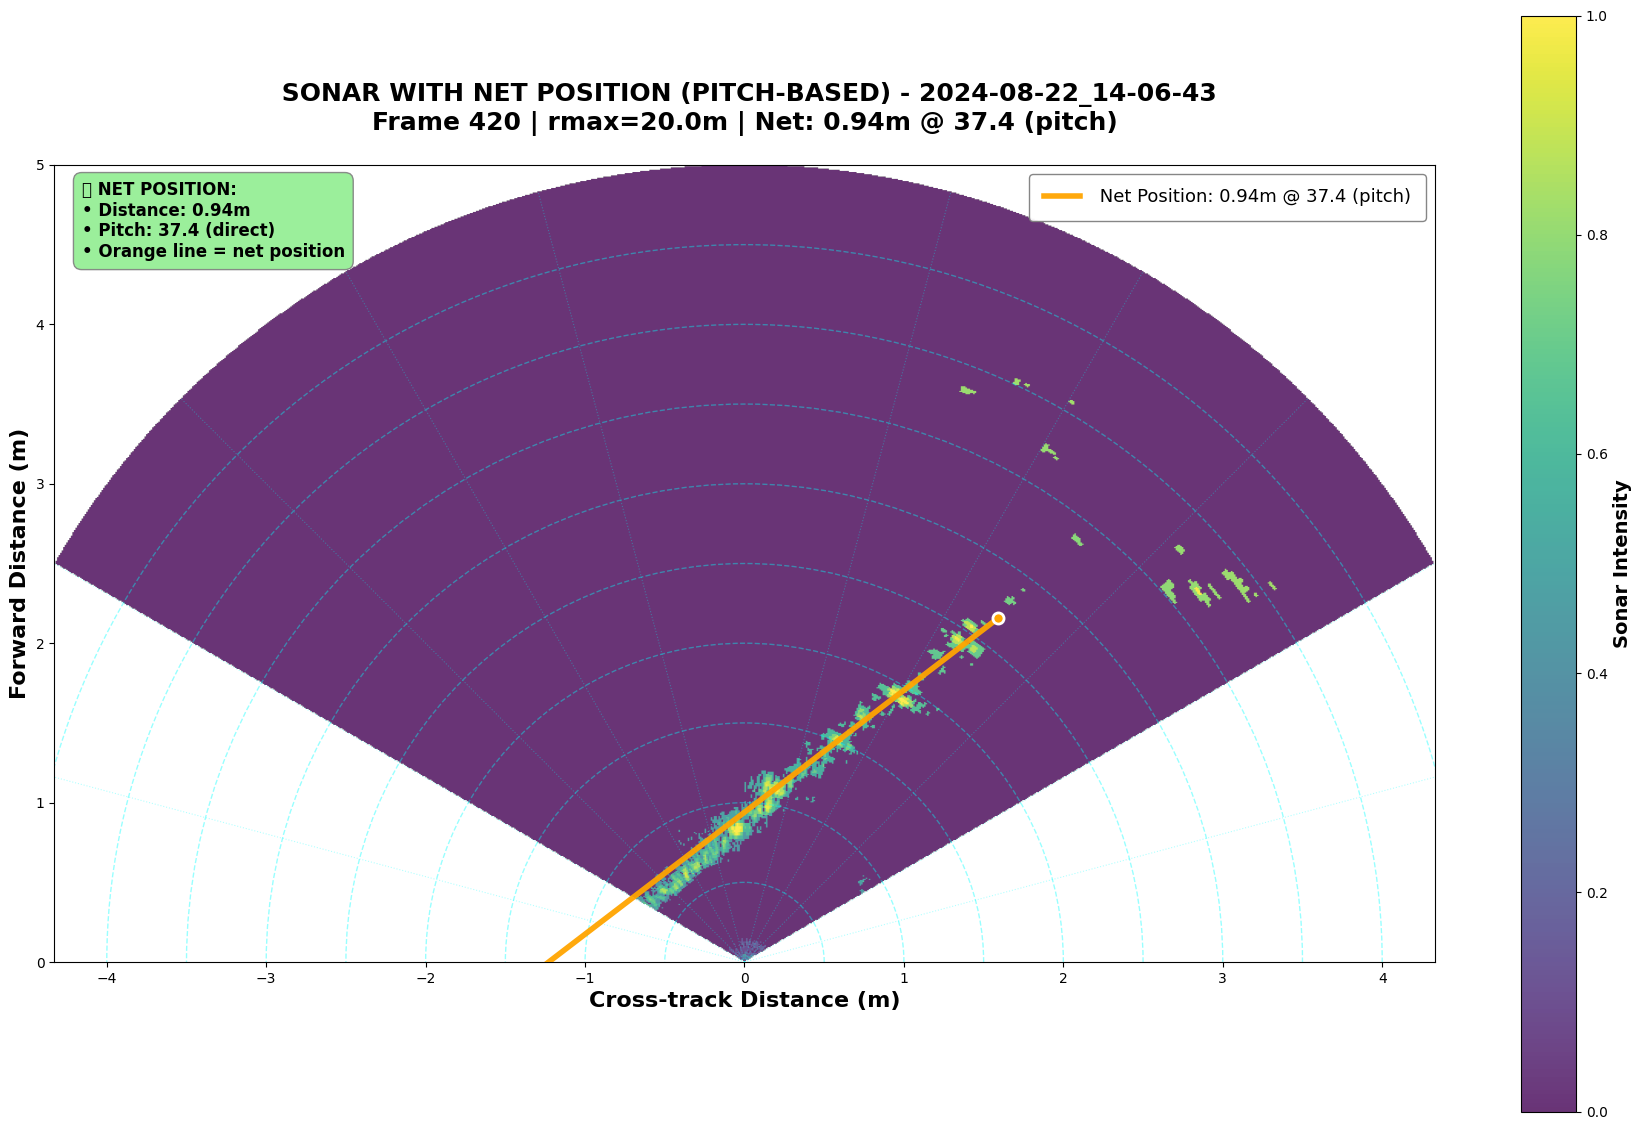

In [7]:
# Process sonar data and create enhanced visualization
from utils.net_distance_analysis import process_sonar_data_and_visualize

process_sonar_data_and_visualize(
    processed_cone=processed_cone,
    extent=extent,
    sonar_params=sonar_params,
    target_bag=TARGET_BAG,
    frame_index=FRAME_INDEX,
    exports_folder=EXPORTS_FOLDER,
    nav_data=nav_data,
    guidance_data=guidance_data,
    distance_measurements=distance_measurements
)